In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import math
import shutil
import glob
import keras
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array , load_img

CNN Model

In [2]:
model = Sequential()

model.add(Conv2D(filters= 16 , kernel_size= (3,3), activation= 'relu'))

model.add(Conv2D(filters= 36 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten(input_shape = (224,224,3) ))
model.add(Dense(units=64,activation= 'relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation= 'sigmoid'))


#model.summary()

In [3]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy']) 

Preparing our Data using Data generator



In [4]:
def preprocessingpretrainedimages(path):
    # input : path 
    # output : pre trained images
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/225, horizontal_flip= True)  #data augmentation
    image = image_data.flow_from_directory(directory= path, target_size= (224,244),batch_size= 64, class_mode= 'binary')

    return image

def preprocessingpretestedimages(path):
    # input : path 
    # output : pre tested images
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/225, horizontal_flip= True) #data augmentation
    image = image_data.flow_from_directory(directory= path, target_size= (224,244),batch_size= 6, class_mode= 'binary')

    return image  

def preProcessingValImages(path):
    # input : path 
    # output : pre tested images
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/225, horizontal_flip= True) #data augmentation
    image = image_data.flow_from_directory(directory= path, target_size= (224,244),batch_size= 6, class_mode= 'binary')

    return image       

In [5]:
train_path = "BrainvsBreastModelData\Train"
test_path = "BrainvsBreastModelData\Test"
val_path="BrainvsBreastModelData\Val"

train_data = preprocessingpretrainedimages(train_path)
test_data = preprocessingpretrainedimages(test_path)
val_data = preProcessingValImages(val_path)

Found 1381 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


Early Stopping & Model Checkpoints

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=6,verbose=1,mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy",filepath="BvsB.h5",save_best_only=True,verbose=1,mode='auto') 
cd=[es,mc] 

Model Training

In [7]:
model_history = model.fit_generator(generator= train_data, steps_per_epoch= 8 , epochs= 30, verbose= 1, validation_data= val_data, validation_steps= 16,callbacks= cd )


C:\Users\hamod\AppData\Local\Temp\ipykernel_3924\1525570719.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(generator= train_data, steps_per_epoch= 8 , epochs= 30, verbose= 1, validation_data= val_data, validation_steps= 16,callbacks= cd )


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.8833 - accuracy: 0.6845
Epoch 1: val_accuracy improved from -inf to 0.52083, saving model to BvsB.h5
8/8 [==============================] - 27s 3s/step - loss: 0.8833 - accuracy: 0.6845 - val_loss: 0.4814 - val_accuracy: 0.5208
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.2855 - accuracy: 0.8691
Epoch 2: val_accuracy improved from 0.52083 to 1.00000, saving model to BvsB.h5
8/8 [==============================] - 29s 4s/step - loss: 0.2855 - accuracy: 0.8691 - val_loss: 0.2315 - val_accuracy: 1.0000
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9570
Epoch 3: val_accuracy did not improve from 1.00000
8/8 [==============================] - 26s 3s/step - loss: 0.1859 - accuracy: 0.9570 - val_loss: 0.0522 - val_accuracy: 1.0000
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9590
Epoch 4: val_accuracy did not improve from 

Model Graphical Interpretation

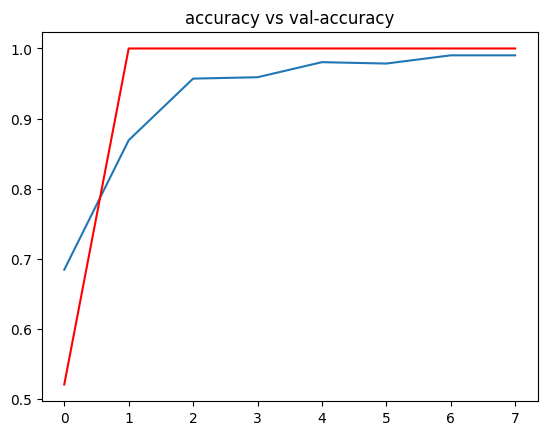

In [8]:
h = model_history.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")

plt.title("accuracy vs val-accuracy")
plt.show()

Model Accuracy

In [9]:
from keras.models import load_model

acc = model.evaluate(val_data)[1]

print(f"the accuracy of our model is { acc * 100 } % ")

50/50 [==============================] - 6s 116ms/step - loss: 0.0083 - accuracy: 1.0000
the accuracy of our model is 100.0 % 


Model Testing

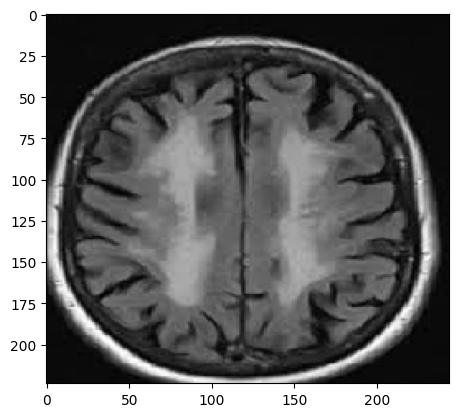

1/1 [==============================] - 0s 34ms/step
image is a brain scan 


In [11]:
path = "BrainvsBreastModelData//Test//brain//no501.jpg"

img = load_img(path , target_size= (224,244))
input_arr = img_to_array(img)/255
input_arr = np.expand_dims(input_arr,axis=0)

plt.imshow(img)
plt.show()

pred = model.predict(input_arr)[0][0]


if pred < 0.5:
    print(f"image is a brain scan ")
else:
    print(f"image is a breast scan")  